<h1 align="center">k-Means Clustering</h1>

### Implementing k-Means Clustering in Python from Scratch

In [26]:
#import libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

In [27]:
#read data from CSV

data = pd.read_csv('../data/clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


**Let's take only two variables from data - "LoanAmount" and "ApplicantIncome". This will help us to easily visualize the steps as well.**

In [28]:
X = data[["LoanAmount", "ApplicantIncome"]]

In [29]:
X

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333
...,...,...
376,128.0,5703
377,108.0,3232
378,71.0,2900
379,40.0,4106


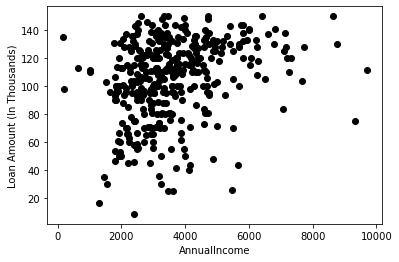

In [30]:
#Visualize the data points

plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

### # Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

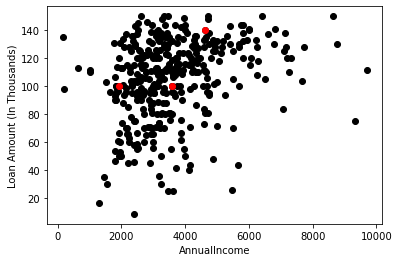

In [31]:
#number of clusters
K = 3

# Select random observation as centroids
Centroids = (X.sample(n=K)) # choose k random values from X
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [41]:
Centroids

,LoanAmount,ApplicantIncome
Cluster,,
1,109.756410,4033.596154
2,119.488372,6512.767442
3,97.472527,2497.972527


In [42]:
for index1, row_c in Centroids.iterrows():
    print(index1, row_c[0], row_c[1])

1 109.75641025641026 4033.596153846154
2 119.48837209302326 6512.767441860465
3 97.47252747252747 2497.9725274725274


In [32]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

In [33]:
diff = 1 # difference between new centroids and prev centroids
j=0

while(diff!=0):
    # Calculating distance between each centroid and the data point.
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[] # Euclidian Distance
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    
    # Calculating the minimum distance out of the 3 centroids
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    # Calculating new centroids
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

392.5821405312642
164.02895622037718
216.46048597900057
268.22267002311116
226.53941037624114
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


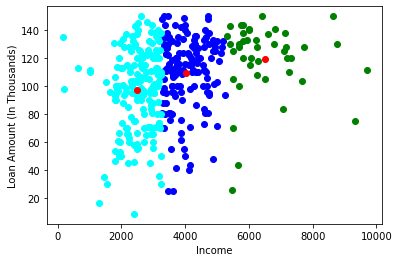

In [34]:
color=['blue','green','cyan']

# Plot data points
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])

# Plot centroids
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [43]:
X

,LoanAmount,ApplicantIncome,1,2,3,Cluster
0,128.0,4583,549.706662,1929.786213,2085.250941,1
1,66.0,3000,1034.521934,3513.174648,503.013025,3
2,120.0,2583,1450.632322,3929.767475,87.961117,3
3,141.0,6000,1966.652040,513.218472,3502.297968,2
4,95.0,2333,1700.660175,4179.839177,164.991055,3
...,...,...,...,...,...,...
376,128.0,5703,1669.503528,809.812174,3205.172854,2
377,108.0,3232,801.598078,3280.787556,734.102962,3
378,71.0,2900,1134.258480,3613.092818,402.898105,3
379,40.0,4106,100.539911,2408.079716,1609.054208,1
